In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-take-off-data-jfk-airport/M1_final.csv


In [76]:
df=pd.read_csv("../input/flight-take-off-data-jfk-airport/M1_final.csv")
df.head(10)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
5,11,1,5,AA,N983NN,ORD,-1,161,740,359,...,32,58,W,24,35,29.91,Fair / Windy,9,17,21
6,11,1,5,AA,N107NN,LAX,-1,373,2475,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,26
7,11,1,5,B6,N274JB,BUF,-5,80,301,365,...,32,58,W,24,35,29.91,Fair / Windy,17,21,11
8,11,1,5,B6,N663JB,LGB,0,368,2465,365,...,32,58,W,24,35,29.91,Fair / Windy,17,21,25
9,11,1,5,B6,N283JB,FLL,3,184,1069,370,...,32,58,W,24,35,29.91,Fair / Windy,17,21,29


In [77]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

(28820, 23)

In [78]:
df["Dew Point"] = df["Dew Point"].astype(int)
df.drop('TAIL_NUM', axis = 1, inplace = True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   DEST               28820 non-null  object 
 5   DEP_DELAY          28820 non-null  int64  
 6   CRS_ELAPSED_TIME   28820 non-null  int64  
 7   DISTANCE           28820 non-null  int64  
 8   CRS_DEP_M          28820 non-null  int64  
 9   DEP_TIME_M         28820 non-null  int64  
 10  CRS_ARR_M          28820 non-null  int64  
 11  Temperature        28820 non-null  int64  
 12  Dew Point          28820 non-null  int64  
 13  Humidity           28820 non-null  int64  
 14  Wind               28818 non-null  object 
 15  Wind Speed         28820 non-null  int64  
 16  Wind Gust          288

In [80]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["OP_UNIQUE_CARRIER"] = le.fit_transform(df["OP_UNIQUE_CARRIER"].astype(str))
df["DEST"] = le.fit_transform(df["DEST"].astype(str))
df["Wind"] = le.fit_transform(df["OP_UNIQUE_CARRIER"].astype(str))
df["Condition"] =le.fit_transform(df["Condition"].astype(str))

In [81]:
df.head(10)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,3,10,-1,124,636,324,323,...,34,58,3,25,38,29.86,4,9,17,14
1,11,1,5,3,28,-7,371,2475,340,333,...,34,58,3,25,38,29.86,4,9,17,15
2,11,1,5,3,20,40,181,1069,301,341,...,34,58,3,25,38,29.86,4,9,17,22
3,11,1,5,3,30,-2,168,944,345,343,...,34,58,3,25,38,29.86,4,9,17,12
4,11,1,5,4,1,-4,139,760,360,356,...,32,58,4,24,35,29.91,4,9,17,13
5,11,1,5,1,36,-1,161,740,359,358,...,32,58,1,24,35,29.91,4,9,17,21
6,11,1,5,1,28,-1,373,2475,360,359,...,32,58,1,24,35,29.91,4,9,17,26
7,11,1,5,3,7,-5,80,301,365,360,...,32,58,3,24,35,29.91,4,17,21,11
8,11,1,5,3,29,0,368,2465,365,365,...,32,58,3,24,35,29.91,4,17,21,25
9,11,1,5,3,20,3,184,1069,370,373,...,32,58,3,24,35,29.91,4,17,21,29


In [82]:
X = df.drop("TAXI_OUT", axis = 1)
X.head()
y = df.TAXI_OUT
y.head()

0    14
1    15
2    22
3    12
4    13
Name: TAXI_OUT, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [120]:
X_train.head()
mse_le = np.empty(8,dtype = float)

**MODEL 1: LINEAR REGRESSOR**


In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR =LinearRegression()
LR=LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

mse_le[0] = mean_squared_error(y_test,y_pred,squared = False)
mse_le[0]

6.469712526817591

**MODEL 2: RIDGE**

In [122]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

RR=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(RR,parameters,scoring='neg_root_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.47108e-22): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.86318e-20): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.6646e-20): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.86103e-20): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.8562e-21): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgW

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_root_mean_squared_error')

In [123]:
#import sklearn
#sorted(sklearn.metrics.SCORERS.keys
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-6.558147603884612


In [124]:
#RR = Ridge(alpha=55, normalize=True)
#RR.fit(X_train, y_train)
y_pred = ridge_regressor.predict(X_test)

mse_le[1] = mean_squared_error(y_test,y_pred,squared = False)
mse_le[1]

6.47011337016052

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TAXI_OUT', ylabel='Density'>

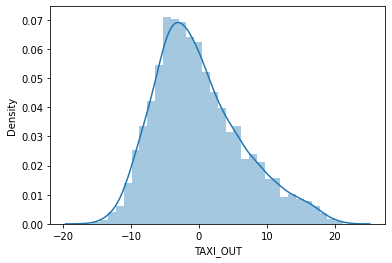

In [125]:
import seaborn as sns

sns.distplot(y_test-y_pred)

**MODEL 3: LASSO**

In [126]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform 

LR = Lasso()
parameter = {'alpha': uniform()}
lasso_Regressor = RandomizedSearchCV(LR, parameter)
lasso_Regressor.fit(X_train, y_train)



RandomizedSearchCV(estimator=Lasso(),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8c19a701d0>})

In [127]:
print(lasso_Regressor.best_params_)
print(lasso_Regressor.best_score_)

{'alpha': 0.08039876239666999}
0.08394282441608795


In [128]:
y_pred = lasso_Regressor.predict(X_test)

mse_le[2] = mean_squared_error(y_test,y_pred,squared = False)
mse_le[2]

6.479626172371031

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TAXI_OUT', ylabel='Density'>

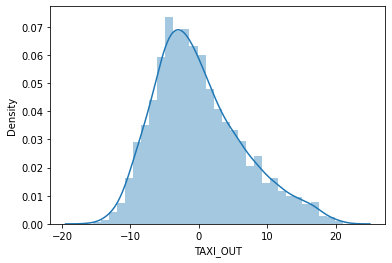

In [129]:
import seaborn as sns

sns.distplot(y_test-y_pred)

**MODEL 4: KNN**

In [130]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict

error = []
for k in range(1,201, 10):
    print(k)
    KNNR = KNeighborsRegressor(n_neighbors = k)
    y_pred = cross_val_predict(KNNR, X_train, y_train, cv = 5)
    error.append(mean_squared_error(y_train, y_pred, squared=False))
    


1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191


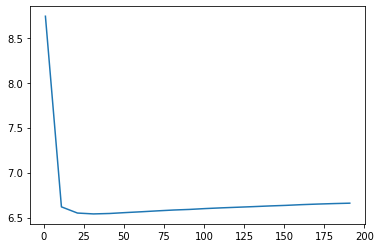

In [131]:
import matplotlib.pyplot as plt
plt.plot(range(1,201,10), error)

11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


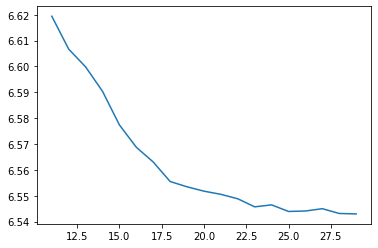

In [132]:

error = []
for k in range(11,30):
    print(k)
    KNNR = KNeighborsRegressor(n_neighbors = k)
    y_pred = cross_val_predict(KNNR, X_train, y_train, cv = 5)
    error.append(mean_squared_error(y_train, y_pred, squared=False))
    
import matplotlib.pyplot as plt
plt.plot(range(11,30), error)
    

In [133]:
KNNR = KNeighborsRegressor(n_neighbors=25)
KNNR.fit(X_train, y_train)
y_pred = KNNR.predict(X_test)

mse_le[3] = mean_squared_error(y_test, y_pred, squared=False)
mse_le[3]

6.533153372681411

**MODEL 5: SVR**

In [134]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
SC1 = StandardScaler()
SC2 = StandardScaler()
x1 = X_train.copy()
x2 = X_test.copy()
x1 = SC1.fit_transform(x1)
x2 = SC2.fit_transform(x2)
svr = SVR()
svr.fit(x1,y_train)
y_pred=svr.predict(x2)
mse_le[4] = mean_squared_error(y_test,y_pred,squared = False)
mse_le[4]

6.308090562142028

**MODEL 6: NAIVE BAYES**

In [135]:
from sklearn.linear_model import BayesianRidge
BRR = BayesianRidge()
BRR.fit(X_train,y_train)
y_pred = BRR.predict(X_test)
mse_le[5] = mean_squared_error(y_test , y_pred,squared=False)
mse_le[5]

6.4763415150092385

**MODEL 7: LIGHTGBM**

In [136]:
from lightgbm import LGBMRegressor
LGBM = LGBMRegressor()
LGBM.fit(X_train, y_train)
y_pred = LGBM.predict(X_test)
mse_le[6] = mean_squared_error(y_test,y_pred, squared = False)
mse_le[6]

5.736825347841012

**MODEL 8: Random Forests**

In [137]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)
mse_le[7] = mean_squared_error(y_test, y_pred, squared = False)
mse_le[7]

5.583501229690648

**ONE HOT ENCODE**

In [84]:
from sklearn.preprocessing import OneHotEncoder

In [85]:
#3 4 14 18
cols = [3,4,14,18]
cols = df.columns[cols]
cols

Index(['OP_UNIQUE_CARRIER', 'DEST', 'Wind', 'Condition'], dtype='object')

In [86]:
OHE = OneHotEncoder(handle_unknown='ignore', sparse=False)
OHcols = pd.DataFrame(OHE.fit_transform(df[cols]))
OHcols.index = df.index
numcols = df.drop(cols, axis = 1)

df2 = pd.concat([numcols, OHcols], axis = 1)


In [88]:
y=df2.TAXI_OUT
X=df2.drop(['TAXI_OUT'], axis =1)

X_train1, X_test1, y_train1, y_test1 = train_test_split( X, y, test_size=0.1 , random_state = 42)

In [92]:
print (np.all(y_train == y_train1))#all outputs match the previous split ensuring testing on same inputs
print (np.all(y_test == y_test1))

True
True


**AFTER ONE HOT ENCODE**

In [61]:
mse_ohe = np.empty(8,dtype = float)

**MODEL 1: LINEAR REGRESSOR**


In [98]:
LR =LinearRegression()
LR=LR.fit(X_train1,y_train1)
y_pred = LR.predict(X_test1)

mse_ohe[0] = mean_squared_error(y_test1,y_pred,squared = False)
mse_ohe[0]

6.334947225273778

**MODEL 2: RIDGE**

In [99]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

RR=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(RR,parameters,scoring='neg_root_mean_squared_error',cv=5)
ridge_regressor.fit(X_train1,y_train1)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.6398e-21): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.62616e-21): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.63215e-21): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.62432e-21): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.63877e-21): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlg

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_root_mean_squared_error')

In [100]:
#import sklearn
#sorted(sklearn.metrics.SCORERS.keys
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-6.362291537765392


In [107]:
#RR = Ridge(alpha=55, normalize=True)
#RR.fit(X_train, y_train)
y_pred = ridge_regressor.predict(X_test1)

mse_ohe[1] = mean_squared_error(y_test1,y_pred,squared = False)
mse_ohe[1]

6.334550024856712

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TAXI_OUT', ylabel='Density'>

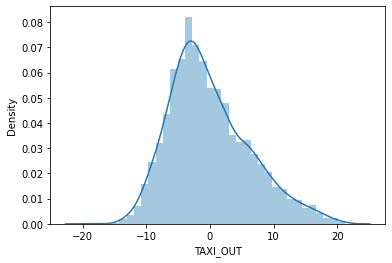

In [102]:
import seaborn as sns

sns.distplot(y_test1-y_pred)

**MODEL 3: LASSO**

In [103]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform 

LR = Lasso()
parameter = {'alpha': uniform()}
lasso_Regressor = RandomizedSearchCV(LR, parameter)
lasso_Regressor.fit(X_train1, y_train1)



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1206.918987245881, tolerance: 97.57431558554212
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 972.1117976903915, tolerance: 97.67821867951812
  positive)


RandomizedSearchCV(estimator=Lasso(),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8c1915ae90>})

In [104]:
print(lasso_Regressor.best_params_)
print(lasso_Regressor.best_score_)

{'alpha': 0.033621093744116815}
0.10655814598672206


In [108]:
y_pred = lasso_Regressor.predict(X_test1)

mse_ohe[2] = mean_squared_error(y_test1,y_pred,squared = False)
mse_ohe[2]

6.4446976141878345

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TAXI_OUT', ylabel='Density'>

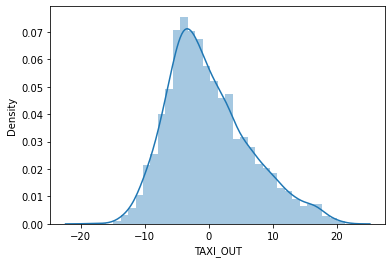

In [106]:
import seaborn as sns

sns.distplot(y_test1-y_pred)

**MODEL 4: KNN**

In [109]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict

error = []
for k in range(1,201, 10):
    print(k)
    KNNR = KNeighborsRegressor(n_neighbors = k)
    y_pred = cross_val_predict(KNNR, X_train1, y_train1, cv = 5)
    error.append(mean_squared_error(y_train1, y_pred, squared=False))
    


1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191


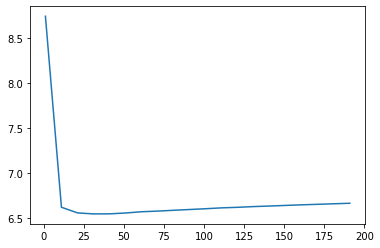

In [111]:
import matplotlib.pyplot as plt
plt.plot(range(1,201,10), error)

11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


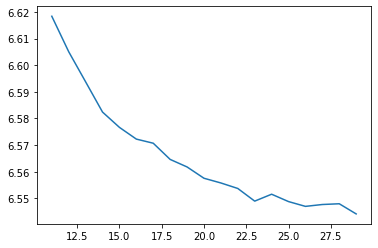

In [112]:

error = []
for k in range(11,30):
    print(k)
    KNNR = KNeighborsRegressor(n_neighbors = k)
    y_pred = cross_val_predict(KNNR, X_train1, y_train1, cv = 5)
    error.append(mean_squared_error(y_train1, y_pred, squared=False))
    
import matplotlib.pyplot as plt
plt.plot(range(11,30), error)
    

In [115]:
KNNR = KNeighborsRegressor(n_neighbors=30)
KNNR.fit(X_train1, y_train1)
y_pred = KNNR.predict(X_test1)

mse_ohe[3] = mean_squared_error(y_test1, y_pred, squared=False)
mse_ohe[3]

6.5329275060784315

**MODEL 5: SVR**

In [116]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
SC1 = StandardScaler()
SC2 = StandardScaler()
x1 = X_train1.copy()
x2 = X_test1.copy()
x1 = SC1.fit_transform(x1)
x2 = SC2.fit_transform(x2)
svr = SVR()
svr.fit(x1,y_train1)
y_pred=svr.predict(x2)
mse_ohe[4] = mean_squared_error(y_test1,y_pred,squared = False)
mse_ohe[4]

6.406332460980116

**MODEL 6: NAIVE BAYES**

In [117]:
from sklearn.linear_model import BayesianRidge
BRR = BayesianRidge()
BRR.fit(X_train1,y_train1)
y_pred = BRR.predict(X_test1)
mse_ohe[5] = mean_squared_error(y_test1 , y_pred,squared=False)
mse_ohe[5]

6.333737690656915

**MODEL 7: lightGBM**

In [118]:
from lightgbm import LGBMRegressor
LGBM = LGBMRegressor()
LGBM.fit(X_train1, y_train1)
y_pred = LGBM.predict(X_test1)
mse_ohe[6] = mean_squared_error(y_test1,y_pred, squared = False)
mse_ohe[6]

5.735859643250822

**MODEL 8: Random Forests**

In [119]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100)
RFR.fit(X_train1,y_train1)
y_pred = RFR.predict(X_test1)
mse_ohe[7] = mean_squared_error(y_test1, y_pred, squared = False)
mse_ohe[7]

5.6130825795113335

**COMPARATIVE GRAPHS**

LR : Linear Regression
RR : Ridge Regression
LSR : Lasso Regression
KNNR : KNN Regression
SVR : Support Vector Regression
NBR : Naive Bayes
LGBM : Light GBM
RFR : Random forest regression


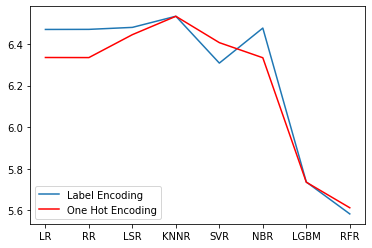

In [138]:
import matplotlib.pyplot as plt
models=["Linear Regression","Ridge Regression","Lasso Regression","KNN Regression","Support Vector Regression","Naive Bayes","Light GBM","Random forest regression"]
mod1=["LR","RR","LSR","KNNR","SVR","NBR","LGBM","RFR"]
plt.plot(mod1,mse_le)
plt.plot(mod1,mse_ohe,'r')
plt.legend(["Label Encoding","One Hot Encoding"])
for i in range(8) :
  print(mod1[i],":",models[i])
plt.show()

We see that in general One hot encoding does significantly better than just Label Encoding and has lower error. Thus improvement in results is obtained almost all of the 8 models.